# ANZ virtual internship 
## Building a salary predicting model

Build a simple regression model to predict the annual salary for each customer using the attributes we identified earlier. 

How accurate is the model? Should ANZ use it to segment customers (for whom it does not have this data) into income brackets for reporting purposes?

For a challenge: build a decision-tree based model to predict salary.

# Import libraries and data

In [385]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set_theme(style='whitegrid')
%matplotlib inline

### Load file

In [414]:
df = pd.read_excel('anz_new_feats.xlsx')
df.head(2)

,status,card_present_flag,account,currency,txn_description,merchant_id,first_name,balance,gender,age,...,state,annual_salary,avg_weekly_purch_num,avg_weekly_trans_num,no_trans_days,avg_trans_amount,max_amount,num_large_trans,avg_trans_amount_overall,med_balance
0,authorized,1.0,ACC-1598451071,AUD,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,F,26,...,QLD,56765,76,83,82,18,1452.2,4,45,1580.4
1,authorized,0.0,ACC-1598451071,AUD,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,F,26,...,QLD,56765,76,83,82,18,1452.2,4,45,1580.4


### Encoding categorical features

In [415]:
cat_feats = df[['status', 'txn_description', 'gender', 'state', 'age_bin']]

In [416]:
cat_feats = pd.get_dummies(cat_feats, drop_first=True)
cat_feats.head(2)

,status_posted,txn_description_PAY/SALARY,txn_description_PAYMENT,txn_description_PHONE BANK,txn_description_POS,txn_description_SALES-POS,gender_M,state_NT,state_QLD,state_SA,state_VIC,state_WA,age_bin_below20,age_bin_btwn20n40,age_bin_btwn40n60
0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0


In [417]:
num_feats = df[['balance', 'amount', 'annual_salary', 'avg_weekly_purch_num', 'avg_weekly_trans_num', 'no_trans_days', 
'avg_trans_amount', 'max_amount', 'num_large_trans', 'avg_trans_amount_overall', 'med_balance']]
num_feats.head(3)

,balance,amount,annual_salary,avg_weekly_purch_num,avg_weekly_trans_num,no_trans_days,avg_trans_amount,max_amount,num_large_trans,avg_trans_amount_overall,med_balance
0,35.39,16.25,56765,76,83,82,18,1452.2,4,45,1580.40
1,21.20,14.19,56765,76,83,82,18,1452.2,4,45,1580.40
2,5.71,6.42,52110,39,43,70,35,2349.6,7,78,1132.66


## Check correlation

In [418]:
# dropping avg_trans_amount_overall because it also contains salary payments
num_feats = num_feats.drop('avg_trans_amount_overall', axis=1) 

In [419]:
num_feats.corr()['annual_salary'].sort_values(ascending=False)

annual_salary           1.000000
med_balance             0.258076
balance                 0.257159
amount                  0.091111
avg_trans_amount        0.044312
num_large_trans        -0.045275
avg_weekly_trans_num   -0.079352
max_amount             -0.097739
no_trans_days          -0.172765
avg_weekly_purch_num   -0.189532
Name: annual_salary, dtype: float64

##### *Scale numerical features*

In [392]:
# from sklearn.preprocessing import MinMaxScaler

In [393]:
# numerical_feats = num_feats.drop('annual_salary', axis=1)

In [394]:
# scaler_x = MinMaxScaler()
# num_feats_scaled = scaler_x.fit_transform(numerical_feats)

# salary = df['annual_salary'].values.reshape(-1, 1)
# scaler_y = MinMaxScaler()
# salary_scaled = scaler_y.fit_transform(salary)

In [395]:
# get column names
# scaled_num_df = pd.DataFrame(data = num_feats_scaled, columns = numerical_feats.columns, index = numerical_feats.index)
# Pass the index of df_merged_num, otherwise it will sum up the index.

In [396]:
# scaled_y = pd.DataFrame(data = salary_scaled, columns = ['annual_salary'], index = numerical_feats.index)

In [397]:
# merge model features to one dataframe
# frames = [scaled_num_df, cat_feats]
# model_feats = pd.concat(frames, axis=1)

##### *SCALED Split train and test data*

In [398]:
# X = model_feats
# y = scaled_y

In [399]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Define data

In [420]:
num_feats = num_feats.drop('annual_salary', axis=1)

In [421]:
# merge model features to one dataframe
frames = [num_feats, cat_feats]
model_feats = pd.concat(frames, axis=1)

### NOT SCALED Split train and test data

In [402]:
X = model_feats
y = df['annual_salary']

In [403]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Creating a  Linear Regression Model

In [404]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import median_absolute_error, r2_score

In [405]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [406]:
preds_lm = lm.predict(X_test)

### Valuating the model

In [407]:
from sklearn import metrics
from sklearn.metrics import r2_score, explained_variance_score

In [408]:
print('R-squared', r2_score(y_test, preds_lm)) # accounts for the variation
print('MAE:', metrics.mean_absolute_error(y_test, preds_lm))
print('MSE:', metrics.mean_squared_error(y_test, preds_lm))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds_lm))) # directly comparable witht data, $

R-squared 0.5381890117545585
MAE: 13706.815968071387
MSE: 323705668.54002833
RMSE: 17991.822268464868


In [409]:
preds_lm = preds_lm.reshape(-1, 1)

In [410]:
y_test = y_test.values.reshape(-1, 1)

In [411]:
preds_lm = scaler_y.inverse_transform(preds_lm)
y_test = scaler_y.inverse_transform(y_test)

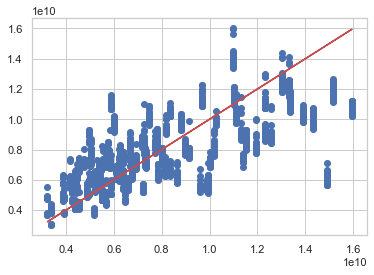

In [413]:
# Our predictions
plt.scatter(y_test, preds_lm)

# Perfect predictions
plt.plot(y_test, y_test,'r');

In [323]:
# Test data real sale price dataframe
test_salary_df = pd.DataFrame(y_test, columns=['Test Y'])

# Predicted prices dataframe
preds_reshape = pd.Series(preds_lm.reshape(3576,))
preds = pd.DataFrame(preds_reshape, columns = ['Predicted'])

# Merge real price and predicted price dataframes
compare_salary_df = pd.merge(test_salary_df, preds, how = 'inner', left_index = True, right_index = True)
compare_salary_df.head(5)

,Test Y,Predicted
0,4.894142e+09,5.216645e+09
1,7.846440e+09,6.231833e+09
2,5.875535e+09,5.806258e+09
3,8.966519e+09,7.714016e+09
4,6.685095e+09,9.128919e+09


In [324]:
# Add a new column with error in prediction compared
compare_salary_df['Error'] = compare_salary_df['Test Y'] - compare_salary_df['Predicted']

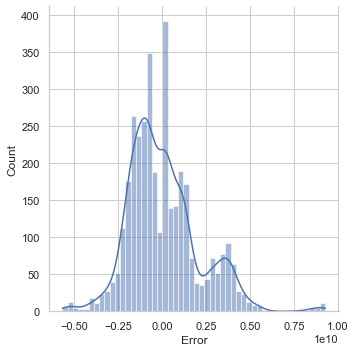

In [325]:
sns.displot(compare_salary_df['Error'], bins = 50, kde = True)

# Gradient boosting for regression

### Split train and test data

In [451]:
X = model_feats
y = df['annual_salary']

In [452]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [453]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [454]:
params = {'n_estimators': 400,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [455]:
model = GradientBoostingRegressor(**params)

In [456]:
y_train = y_train.values.ravel()

In [457]:
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [458]:
boost_preds = model.predict(X_test)

### Valuating the model

In [459]:
from sklearn import metrics
from sklearn.metrics import r2_score, explained_variance_score

In [460]:
print('R-squared', r2_score(y_test, boost_preds)) # accounts for the variation
print('MAE:', metrics.mean_absolute_error(y_test, boost_preds))
print('MSE:', metrics.mean_squared_error(y_test, boost_preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, boost_preds))) # directly comparable witht data, $

R-squared 0.9694667021572054
MAE: 3422.7315716930984
MSE: 21402265.954054385
RMSE: 4626.258310346968


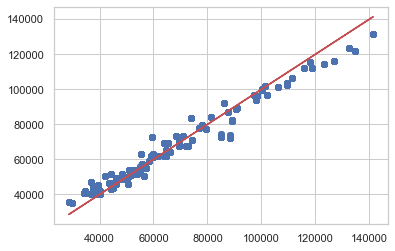

In [461]:
# Our predictions
plt.scatter(y_test, boost_preds)

# Perfect predictions
plt.plot(y_test, y_test,'r')

In [462]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, boost_preds in enumerate(model.staged_predict(X_test)):
    test_score[i] = model.loss_(y_test, boost_preds)

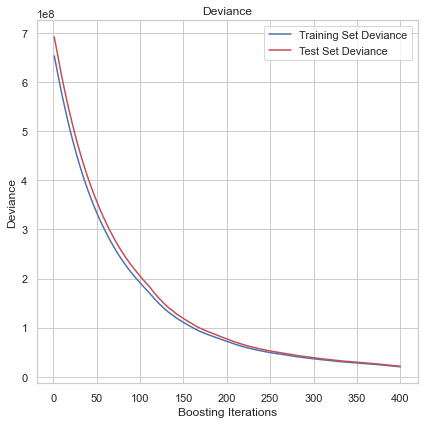

In [463]:
fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, model.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()